In [3]:
!pip install pandas --no-cache-dir
import os 
import pandas as pd
import sklearn
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Read in ASDTest dataset
asd_2018_df = pd.read_csv("dataset_2018.csv")

asd_2018_df.info()

     |████████████████████████████████| 4.7MB 3.6MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7MB 1.7MB/s eta 0:00:01
     |████████████████████████████████| 501kB 15.7MB/s eta 0:00:01
  ERROR: Complete output from command /snap/jupyter/6/bin/python /snap/jupyter/6/lib/python3.7/site-packages/pip/_vendor/pep517/_in_process.py build_wheel /tmp/tmpecc97yaa:
  ERROR: running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-cpython-37
  creating build/lib.linux-x86_64-cpython-37/pandas
  copying pandas/_version.py -> build/lib.linux-x86_64-cpython-37/pandas
  copying pandas/__init__.py -> build/lib.linux-x86_64-cpython-37/pandas
  copying pandas/conftest.py -> build/lib.linux-x86_64-cpython-37/pandas
  copying pandas/_typing.py -> build/lib.linux-x86_64-cpython-37/pandas
  copying pandas/testing.py -> b

Failed to build pandas
ERROR: Could not build wheels for pandas which use PEP 517 and cannot be installed directly


ModuleNotFoundError: No module named 'pandas'

In [3]:
asd_2018_df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [4]:
asd_2018_df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [5]:
mixed_df = asd_2018_df.drop(['Case_No', 'Ethnicity','Who completed the test'],axis=1)
mixed_df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits '],
      dtype='object')

In [6]:
#Create a female only data frame
females = mixed_df[mixed_df['Sex']=='f']

# print("Females: ", females)
females['Class/ASD Traits '].value_counts()

Yes    194
No     125
Name: Class/ASD Traits , dtype: int64

<AxesSubplot:>

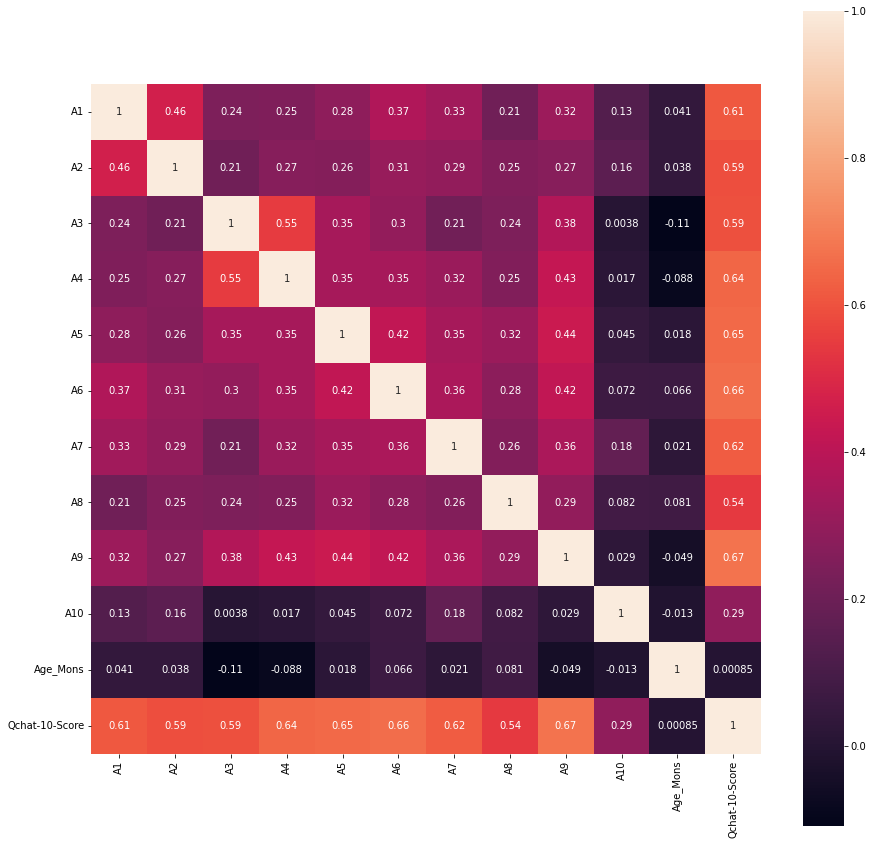

In [7]:
#Mixed correlation
mixed_correlation = mixed_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data=mixed_correlation, annot=True, square=True, cbar=True)

<AxesSubplot:>

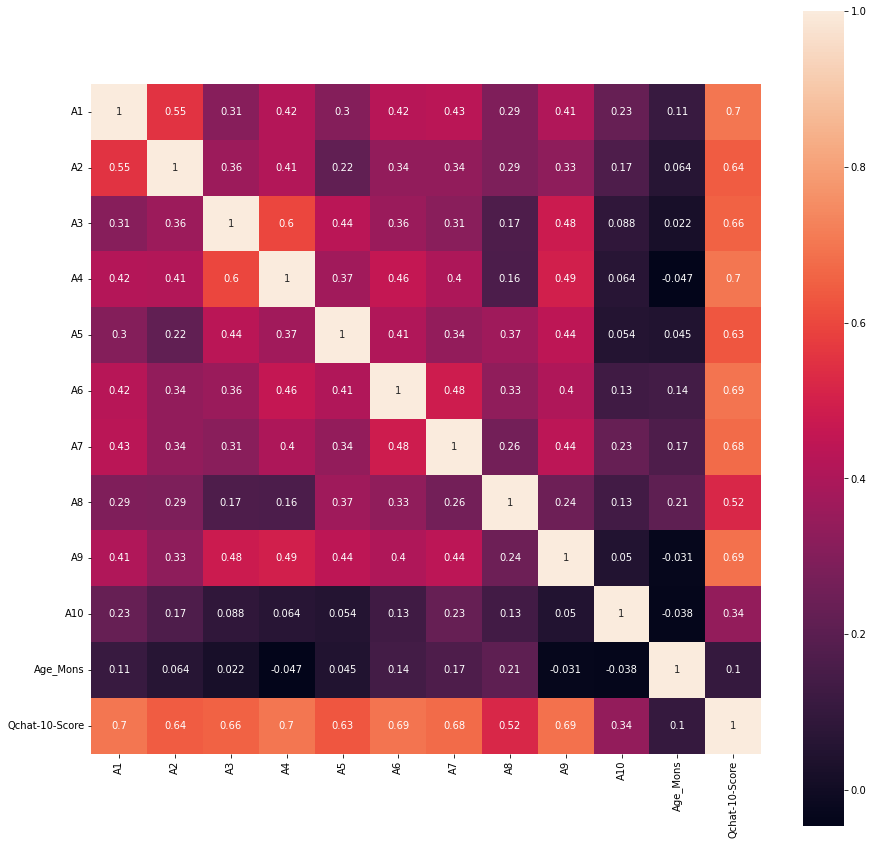

In [8]:
f_corr = females.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data=f_corr, annot=True, square=True, cbar=True)

In [9]:
mixed_asd = mixed_df[mixed_df['Class/ASD Traits ']=='Yes']
mixed_no_asd = mixed_df[mixed_df['Class/ASD Traits ']=='No']
f_asd = females[females['Class/ASD Traits ']=='Yes']
f_no_asd = females[females['Class/ASD Traits ']=='No']

<AxesSubplot:xlabel='Class/ASD Traits ', ylabel='count'>

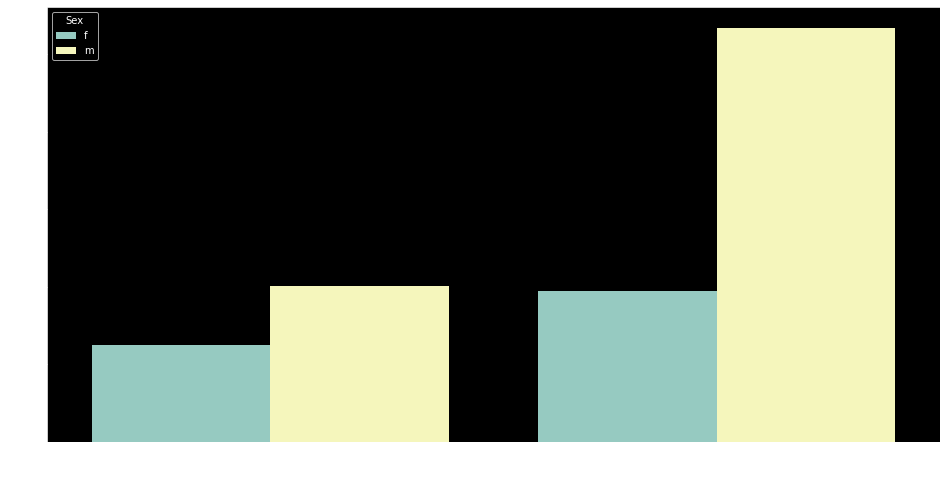

In [10]:
plt.figure(figsize=(16,8))

plt.style.use('dark_background')
sns.countplot(x='Class/ASD Traits ', hue='Sex', data = mixed_df)

In [11]:
mixed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   A1                   1054 non-null   int64 
 1   A2                   1054 non-null   int64 
 2   A3                   1054 non-null   int64 
 3   A4                   1054 non-null   int64 
 4   A5                   1054 non-null   int64 
 5   A6                   1054 non-null   int64 
 6   A7                   1054 non-null   int64 
 7   A8                   1054 non-null   int64 
 8   A9                   1054 non-null   int64 
 9   A10                  1054 non-null   int64 
 10  Age_Mons             1054 non-null   int64 
 11  Qchat-10-Score       1054 non-null   int64 
 12  Sex                  1054 non-null   object
 13  Jaundice             1054 non-null   object
 14  Family_mem_with_ASD  1054 non-null   object
 15  Class/ASD Traits     1054 non-null   object
dtypes: int

In [12]:
# mixed_df = mixed_df.drop('Qchat-10-Score',axis=1)
mixed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   A1                   1054 non-null   int64 
 1   A2                   1054 non-null   int64 
 2   A3                   1054 non-null   int64 
 3   A4                   1054 non-null   int64 
 4   A5                   1054 non-null   int64 
 5   A6                   1054 non-null   int64 
 6   A7                   1054 non-null   int64 
 7   A8                   1054 non-null   int64 
 8   A9                   1054 non-null   int64 
 9   A10                  1054 non-null   int64 
 10  Age_Mons             1054 non-null   int64 
 11  Qchat-10-Score       1054 non-null   int64 
 12  Sex                  1054 non-null   object
 13  Jaundice             1054 non-null   object
 14  Family_mem_with_ASD  1054 non-null   object
 15  Class/ASD Traits     1054 non-null   object
dtypes: int

In [16]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

char_vals = ['Sex', 'Jaundice', 'Family_mem_with_ASD','Class/ASD Traits ']

for c in char_vals:
    mixed_df[c] = encoder.fit_transform(mixed_df[c].values.reshape(-1,1)).toarray()
mixed_df.dtypes
mixed_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,1.0,0.0,1.0,1.0
1,1,1,0,0,0,1,1,0,0,0,36,4,0.0,0.0,1.0,0.0
2,1,0,0,0,0,0,1,1,0,1,36,4,0.0,0.0,1.0,0.0
3,1,1,1,1,1,1,1,1,1,1,24,10,0.0,1.0,1.0,0.0
4,1,1,0,1,1,1,1,1,1,1,20,9,1.0,1.0,0.0,0.0


In [17]:
from sklearn.model_selection import train_test_split

X_mixed, y_mixed = train_test_split(mixed_df, test_size=0.3, random_state=42)

mixed_training = X_mixed.drop("Class/ASD Traits ", axis=1)
mixed_class = X_mixed["Class/ASD Traits "] 

In [20]:
print(mixed_class)

310     0.0
493     1.0
104     0.0
97      0.0
328     1.0
       ... 
330     0.0
466     1.0
121     0.0
1044    0.0
860     0.0
Name: Class/ASD Traits , Length: 737, dtype: float64


Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(mixed_training, mixed_class)



LogisticRegression()

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predictions = log_reg.predict(mixed_training)
log_mse = mean_squared_error(mixed_class, predictions)
log_rmse = np.sqrt(log_mse)

print("Root mean squared error:",log_rmse)
print("Mean squared error: ", log_mse)
# print("Predictions:",predictions)

print("R2 score: ",r2_score(mixed_class,predictions))

Root mean squared error: 0.0
Mean squared error:  0.0
R2 score:  1.0


In [27]:
for c in char_vals:
    females[c] = encoder.fit_transform(females[c].values.reshape(-1,1)).toarray()
females.head()

C:\Users\kalin\AppData\Local\Temp/ipykernel_16824/1605970306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  females[c] = encoder.fit_transform(females[c].values.reshape(-1,1)).toarray()
C:\Users\kalin\AppData\Local\Temp/ipykernel_16824/1605970306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  females[c] = encoder.fit_transform(females[c].values.reshape(-1,1)).toarray()
C:\Users\kalin\AppData\Local\Temp/ipykernel_16824/1605970306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,1.0,1.0,0.0,0.0
4,1,1,0,1,1,1,1,1,1,1,20,9,1.0,0.0,1.0,1.0
12,0,0,0,0,0,0,0,0,0,0,25,0,1.0,1.0,0.0,0.0
13,1,1,1,1,0,0,1,0,1,1,15,7,1.0,1.0,0.0,1.0
17,1,1,1,0,1,1,1,1,0,1,12,8,1.0,1.0,0.0,1.0


In [35]:
X_f, y_f = train_test_split(mixed_df, test_size=0.3, random_state=42)

f_training = X_f.drop("Class/ASD Traits ", axis=1)
f_class = X_f["Class/ASD Traits "] 

In [40]:
log_reg_f = LogisticRegression()
log_reg_f.fit(f_training, f_class)

LogisticRegression()

In [41]:
f_predictions = log_reg_f.predict(f_training)
log_f_mse = mean_squared_error(f_class, f_predictions)
log_f_rmse = np.sqrt(log_f_mse)

print("Root mean squared error:",log_f_rmse)
print("Mean squared error: ", log_f_mse)
# print("Predictions:",predictions)

print("R2 score: ",r2_score(f_class,f_predictions))

Root mean squared error: 0.0
Mean squared error:  0.0
R2 score:  1.0


In [54]:
features = list(mixed_training)
print(np.array(features))

['A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'A10' 'Age_Mons'
 'Qchat-10-Score' 'Sex' 'Jaundice' 'Family_mem_with_ASD']


In [63]:
mixed_coef = np.abs(log_reg.coef_)
sorted(zip(mixed_coef[0],np.array(features)),reverse=True)

[(4.780721538849393, 'Qchat-10-Score'),
 (0.7544040188618627, 'A2'),
 (0.6972392415319227, 'A9'),
 (0.5773897137580077, 'A8'),
 (0.5103543889508909, 'A4'),
 (0.47861712737641404, 'A5'),
 (0.45445296064039575, 'A7'),
 (0.4345449519780556, 'Jaundice'),
 (0.4030877149079467, 'A6'),
 (0.3880384379493876, 'A10'),
 (0.303075183825817, 'A1'),
 (0.21406275104674996, 'A3'),
 (0.20006309484803944, 'Sex'),
 (0.04737760419665933, 'Family_mem_with_ASD'),
 (0.004264818310741112, 'Age_Mons')]

In [64]:
f_coef = np.abs(log_reg_f.coef_)
sorted(zip(f_coef[0],np.array(features)),reverse=True)

[(4.780721538849393, 'Qchat-10-Score'),
 (0.7544040188618627, 'A2'),
 (0.6972392415319227, 'A9'),
 (0.5773897137580077, 'A8'),
 (0.5103543889508909, 'A4'),
 (0.47861712737641404, 'A5'),
 (0.45445296064039575, 'A7'),
 (0.4345449519780556, 'Jaundice'),
 (0.4030877149079467, 'A6'),
 (0.3880384379493876, 'A10'),
 (0.303075183825817, 'A1'),
 (0.21406275104674996, 'A3'),
 (0.20006309484803944, 'Sex'),
 (0.04737760419665933, 'Family_mem_with_ASD'),
 (0.004264818310741112, 'Age_Mons')]